In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Exploratory Data Analysis

## Data Overview

In [2]:
df=pd.read_csv('Consumer_complaints.csv')

/home/ubuntu/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (5,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head().T

,0,1,2,3,4
Date received,03/21/2016,03/21/2016,03/21/2016,03/21/2016,03/21/2016
Product,Debt collection,Consumer Loan,Debt collection,Consumer Loan,Bank account or service
Sub-product,"Other (i.e. phone, health club, etc.)",Personal line of credit,"Other (i.e. phone, health club, etc.)",Vehicle loan,Checking account
Issue,Cont'd attempts collect debt not owed,Problems when you are unable to pay,Cont'd attempts collect debt not owed,Taking out the loan or lease,Problems caused by my funds being low
Sub-issue,Debt was paid,NaN,Debt is not mine,NaN,NaN
Consumer complaint narrative,NaN,NaN,NaN,NaN,NaN
Company public response,Company believes it acted appropriately as aut...,NaN,NaN,NaN,NaN
Company,"Eastern Account Systems of Connecticut, Inc.","OneMain Financial Holdings, LLC",Transworld Systems Inc.,Navy FCU,Navy FCU
State,CA,AL,CT,VA,IN
ZIP code,900XX,35094,06516,235XX,46143


In [4]:
df.shape

(537992, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537992 entries, 0 to 537991
Data columns (total 18 columns):
Date received                   537992 non-null object
Product                         537992 non-null object
Sub-product                     386187 non-null object
Issue                           537979 non-null object
Sub-issue                       203546 non-null object
Consumer complaint narrative    59697 non-null object
Company public response         75922 non-null object
Company                         537992 non-null object
State                           530979 non-null object
ZIP code                        533186 non-null object
Tags                            75267 non-null object
Consumer consent provided?      110728 non-null object
Submitted via                   537989 non-null object
Date sent to company            537992 non-null object
Company response to consumer    537992 non-null object
Timely response?                537992 non-null object
Consumer dis

In [6]:
df=df.dropna(subset=['Consumer complaint narrative'])

In [7]:
df['Consumer complaint narrative'].value_counts().T

This company continues to report on my credit report after I sent them a letter telling them that this account was not mine and I have no idea what it is or who it belongs to! \n\nI asked for proof of a signed contract, I asked for a license to collect in my state, I asked for copies of all information referenced for this debt and still to date, I have not received anything but harassment from this company! \n\nTHIS IS NOT MY DEBT! \n\nI WANT THIS ACCOUNT REMOVED FROM MY CREDIT REPORT AND THIS COMPANY TO STOP CONTACTING ME IMMEDIATELY!                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [8]:
#df=df1.sample(frac=0.1,replace=True)

In [9]:
df.shape

(59697, 18)

In [10]:
df['Company'].value_counts(dropna=False).shape

(2213,)

In [11]:
df['Product'].value_counts(dropna=False)

Debt collection            15730
Mortgage                   13375
Credit reporting           11138
Credit card                 6983
Bank account or service     5136
Consumer Loan               3237
Student loan                1919
Prepaid card                 821
Payday loan                  667
Money transfers              596
Other financial service       95
Name: Product, dtype: int64

In [12]:
df['Sub-issue'].value_counts().shape

(64,)

In [13]:
df['Issue'].value_counts()

Incorrect information on credit report      7447
Cont'd attempts collect debt not owed       6746
Loan servicing, payments, escrow account    5847
Loan modification,collection,foreclosure    4617
Disclosure verification of debt             2612
Communication tactics                       2490
Account opening, closing, or management     1981
Credit reporting company's investigation    1741
Application, originator, mortgage broker    1472
False statements or representation          1467
Managing the loan or lease                  1437
Deposits and withdrawals                    1272
Taking/threatening an illegal action        1244
Dealing with my lender or servicer          1216
Improper contact or sharing of info         1171
Billing disputes                            1062
Settlement process and costs                 928
Unable to get credit report/credit score     912
Problems when you are unable to pay          908
Problems caused by my funds being low        833
Other               

In [14]:
df['Company public response'].value_counts(dropna=False)

NaN                                                                                                                        30556
Company chooses not to provide a public response                                                                           19311
Company believes it acted appropriately as authorized by contract or law                                                    5876
Company has responded to the consumer and the CFPB and chooses not to provide a public response                             1044
Company disputes the facts presented in the complaint                                                                        634
Company believes complaint caused principally by actions of third party outside the control or direction of the company      615
Company believes the complaint is the result of a misunderstanding                                                           561
Company believes complaint is the result of an isolated error                                    

In [15]:
df['Company response to consumer'].value_counts(dropna=False)

Closed with explanation            45491
Closed with non-monetary relief     7738
Closed with monetary relief         4402
Closed                              1614
Untimely response                    450
In progress                            2
Name: Company response to consumer, dtype: int64

In [16]:
df['Tags'].value_counts(dropna=False)

NaN                              49538
Older American                    5424
Servicemember                     4005
Older American, Servicemember      730
Name: Tags, dtype: int64

In [17]:
df['Date received'].max()

'12/31/2015'

In [18]:
df['Date received'].min()

'01/01/2016'

In [19]:
df['Submitted via'].value_counts(dropna=False)

Web    59697
Name: Submitted via, dtype: int64

In [20]:
df['Timely response?'].value_counts(dropna=False)

Yes    57788
No      1909
Name: Timely response?, dtype: int64

In [21]:
df['Consumer disputed?'].value_counts(dropna=False)

No     45750
Yes    13947
Name: Consumer disputed?, dtype: int64

In [22]:
temp= pd.crosstab(df['Product'], df['Consumer disputed?'])

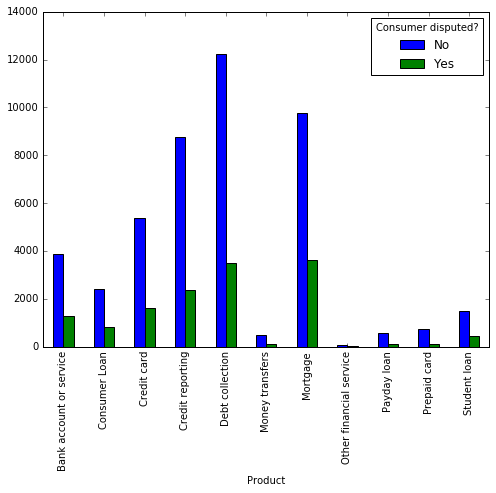

In [23]:
temp.plot(kind='bar',figsize=(8,6))## The disputed percentages are about same between 
###Consent and Consent Not "complaint narrative text".

In [24]:
temp1= pd.crosstab(df['Company response to consumer'], df['Consumer disputed?'])

In [25]:
temp1

Consumer disputed?,No,Yes
Company response to consumer,,
Closed,1099,515
Closed with explanation,33628,11863
Closed with monetary relief,3879,523
Closed with non-monetary relief,6692,1046
In progress,2,0
Untimely response,450,0


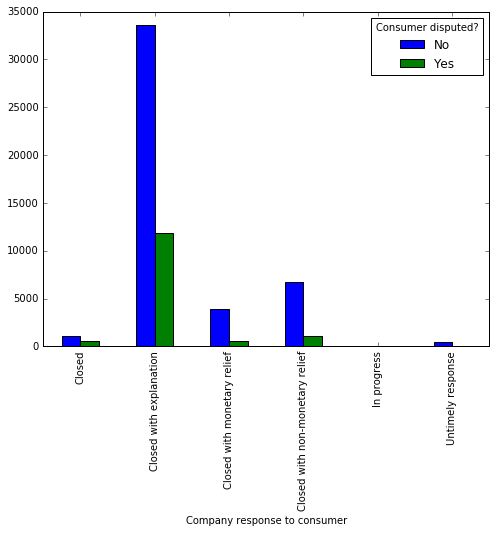

In [26]:
temp1.plot(kind='bar',figsize=(8,6)) ###Most cases are fall in closed with explaination

In [27]:
temp3= pd.crosstab(df['Product'], df['Consumer disputed?'])

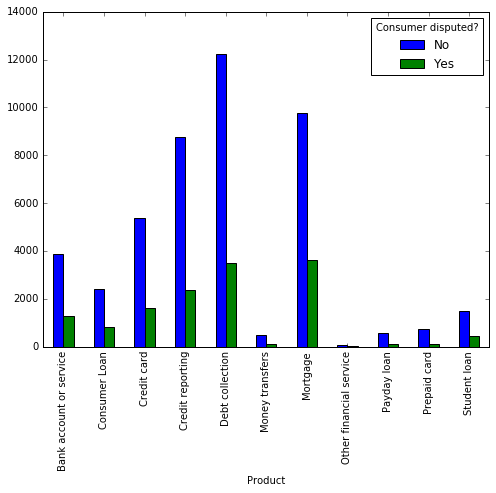

In [28]:
temp3.plot(kind='bar',figsize=(8,6))

In [29]:
##plt.hist(np.log(df['Company'].value_counts()))
##plt.xlabel(df['Company'].value_counts().index)

In [30]:
df['State'].value_counts().shape

(60,)

In [31]:
df['Date received']=pd.DatetimeIndex(df['Date received'],format='%m/%d/%Y').date
df['Date sent to company']=pd.DatetimeIndex(df['Date sent to company'],format='%m/%d/%Y').date

In [32]:
df[df['Date received']!=df['Date sent to company']].shape

(16256, 18)

## Missing Value Handling

In [33]:
df[pd.isnull(df['Issue'])]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID


In [34]:
df['Sub-product'].fillna('Not Provided',inplace=True)
df['Sub-issue'].fillna('Not Provided',inplace=True)
df['Consumer complaint narrative'].fillna('None or Not Provided',inplace=True)
###Combine "company public missing value" with "Company chose not to provide"
df['Company public response'].fillna('Company chooses not to provide',inplace=True) 

###Combine missing value of "Issue" with "Other"
df['Issue'].fillna('Other',inplace=True) 

### Replace missing vlaues of 'Tags' with "'Unknown'
df['Tags'].fillna('Unknown',inplace=True) 

### Replace missing vlaues of 'Submitted via' with "'other'
df['Submitted via'].fillna('Other',inplace=True) 

###Combine missing value,other,and withdrawn of "Consumer consent provided? " 
###with Consumer consent not provided, since only users's complaints narrative will be provided
### with the type of Consumer consent provided
df['Consumer consent provided?'].fillna('Consent not provided',inplace=True) 
df['Consumer consent provided?']=df['Consumer consent provided?'].apply(lambda x: 
            'Consent not provided' if x=='Other' or x=='Consent withdrawn' else x)

In [35]:
### Fill missing 'State' info using valide zipcode.
from pyzipcode import ZipCodeDatabase
zip=ZipCodeDatabase()
for i in df[pd.isnull(df['State'])&pd.notnull(df['ZIP code'])].index:
    try:
        df['State'][i]=str(zip[df['ZIP code'][i]].state)
    except:
        continue

In [36]:
df[pd.isnull(df['State'])&pd.isnull(df['ZIP code'])].shape ###Still 4268 users has no state info

(159, 18)

In [37]:
df['State'].fillna('Not provided',inplace=True)
df['ZIP code'].fillna('Not Provided',inplace=True)

In [38]:
df['Consumer consent provided?'].value_counts(dropna=False)

Consent provided    59697
Name: Consumer consent provided?, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59697 entries, 1394 to 167778
Data columns (total 18 columns):
Date received                   59697 non-null object
Product                         59697 non-null object
Sub-product                     59697 non-null object
Issue                           59697 non-null object
Sub-issue                       59697 non-null object
Consumer complaint narrative    59697 non-null object
Company public response         59697 non-null object
Company                         59697 non-null object
State                           59697 non-null object
ZIP code                        59697 non-null object
Tags                            59697 non-null object
Consumer consent provided?      59697 non-null object
Submitted via                   59697 non-null object
Date sent to company            59697 non-null object
Company response to consumer    59697 non-null object
Timely response?                59697 non-null object
Consumer disputed?     

In [40]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1394,2016-03-09,Credit reporting,Not Provided,Incorrect information on credit report,Account terms,I have been trying to clean my credit report u...,Company has responded to the consumer and the ...,Experian,OK,731XX,Unknown,Consent provided,Web,2016-03-09,Closed with non-monetary relief,Yes,No,1825051
1401,2016-03-09,Credit reporting,Not Provided,Unable to get credit report/credit score,Problem getting report or credit score,"Hi, the i am unable to obtain my my credit rep...",Company has responded to the consumer and the ...,Experian,NY,115XX,Unknown,Consent provided,Web,2016-03-09,Closed with non-monetary relief,Yes,No,1825432
1412,2016-03-09,Credit reporting,Not Provided,Unable to get credit report/credit score,Problem getting report or credit score,"hi, the i am unable to obtain my my credit rep...",Company has responded to the consumer and the ...,"TransUnion Intermediate Holdings, Inc.",NY,115XX,Unknown,Consent provided,Web,2016-03-09,Closed with non-monetary relief,Yes,No,1825018
1413,2016-03-09,Debt collection,I do not know,Disclosure verification of debt,Not given enough info to verify debt,I mailed MRS BPO in XX/XX/XXXX disputing this ...,Company believes it acted appropriately as aut...,"MRS BPO, L.L.C.",TX,787XX,Unknown,Consent provided,Web,2016-03-09,Closed with non-monetary relief,Yes,No,1824499
1420,2016-03-09,Credit card,Not Provided,Closing/Cancelling account,Not Provided,I was approved for a Barclays Master card on X...,Company has responded to the consumer and the ...,Barclays PLC,NY,113XX,Unknown,Consent provided,Web,2016-03-09,Closed with explanation,Yes,Yes,1824698


In [41]:
print df.groupby(df['Consumer disputed?'])['Date received']

# Feature Engineering

## Creating label

In [42]:
replace={'Yes':True, 'No':False}

In [43]:
df['Consumer disputed?']= df['Consumer disputed?'].apply(lambda x: replace[x])

In [44]:
replace1={'Consent provided':True, 'Consent not provided':False}
df['Consumer consent provided?']= df['Consumer consent provided?'].apply(lambda x: replace1[x])

## Feature creating

In [45]:
##process time refers to days between the date CFPB received complaitns and the date 
##when complaints were sent to company on behal of comsume
df['Process time']=(df['Date sent to company']-df['Date received']).astype('timedelta64[D]').astype(int)

In [46]:
#Create bin variabe of process time
process_days_bin = [0,3, 10, 30, 290]
process_days_cut = pd.cut(df['Process time'], process_days_bin, right=True, include_lowest=True)
df['process_days_bin'] = process_days_cut

In [47]:
df['Timely response?'] = df['Timely response?'].apply(lambda x: replace[x])

In [48]:
company_complaitns_counts = df['Company'].value_counts()
df['company_complaint_counts'] = df['Company'].apply(lambda x: company_complaitns_counts[x])

In [49]:
# Create bin variable for counts of complaints of each company
company_user_bin = [1,1000, 2000, 3000, 3750]
company_cut = pd.cut(df['company_complaint_counts'], company_user_bin, right=True, include_lowest=True)
df['company_complaint_counts_bin'] = company_cut

In [50]:
##Build dummy variable for all selected category variables in the dataset
def get_dummy_table(data,column_names):
    df_new=DataFrame()
    for name in column_names:
        data[name].astype('category')
        df_dum=pd.get_dummies(data[name])
        df_new=pd.concat([df_new,df_dum], axis=1)
    return df_new

In [51]:
dummy_for_model=['Product', 'Sub-product','Issue','Sub-issue', 'Company public response','Tags',
                 'Submitted via','Company response to consumer','company_complaint_counts_bin','process_days_bin']

In [52]:
##Cancat the created dummy table with other selected feature to build final feature table
df_model= get_dummy_table(df,dummy_for_model)

In [53]:
df_model=pd.concat([df_model,df['Process time']],axis=1)

In [54]:
df_model=pd.concat([df_model,df['Consumer consent provided?']],axis=1)

In [55]:
df_model=pd.concat([df_model,df['Timely response?']],axis=1)

In [56]:
##Create features about complaint submitted time
df_model['Date_received_year'] = df['Date received'].apply(lambda x: x.year)
df_model['Date_received_month'] = df['Date received'].apply(lambda x: x.month)
df_model['Date_received_day'] = df['Date received'].apply(lambda x: x.day)

In [57]:
#Create features about 'Consumenr complaint narrative'

from string import punctuation, ascii_letters

def process_text_field(text):
    '''
    text: string
    OUTPUT: int, int, int, float (length, word count, uppercase_count_rate, punctuation_rate)
    '''
    length = len(text)
    word_count = 0
    last_char = False
    for c in text:
        if c in ascii_letters:
            if last_char==False:
                word_count += 1
                last_char=True
        else:
            last_char = False
    
    punct_count = 0
    uppercase_count = 0
    for c in text:
        if c in punctuation:
            punct_count += 1
        if c.isupper():
            uppercase_count += 1
    punctuation_rate = punct_count / float(length+1)
    uppercase_count_rate = uppercase_count / float(length+1)
    
    return length, word_count, uppercase_count_rate, punctuation_rate

def process_text_column(df, fieldname):
    length_list = []
    word_count_list = []
    punctuation_rate_list = []
    uppercase_count_rate_list=[]
    for row_ix in df.index:
        length, word_count, uppercase_count_rate, punctuation_rate = process_text_field(df[fieldname][row_ix])
        length_list.append(length)
        word_count_list.append(word_count)
        uppercase_count_rate_list.append(uppercase_count_rate)
        punctuation_rate_list.append(punctuation_rate)
    return length_list, word_count_list, uppercase_count_rate_list, punctuation_rate_list

In [58]:
length_list, word_count_list, uppercase_count_rate_list, punctuation_rate_list = process_text_column(df, 'Consumer complaint narrative')

In [59]:
df_model['complaint_length'] = length_list
df_model['complaint_wordcount'] = word_count_list
df_model['complaint_uppercaserate'] = uppercase_count_rate_list
df_model['complaint_punctuationrate'] = punctuation_rate_list

In [60]:
df_model.head().T

,1394,1401,1412,1413,1420
Bank account or service,0,0,0,0,0
Consumer Loan,0,0,0,0,0
Credit card,0,0,0,0,1
Credit reporting,1,1,1,0,0
Debt collection,0,0,0,1,0
Money transfers,0,0,0,0,0
Mortgage,0,0,0,0,0
Other financial service,0,0,0,0,0
Payday loan,0,0,0,0,0
Prepaid card,0,0,0,0,0


# Modeling

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
import sklearn.metrics as skm
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from scipy import interp
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [62]:
stemmer = SnowballStemmer("english")

def stem_tokens(tokens, stemmer):
    stemmed=[]
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [63]:
X_word = df['Consumer complaint narrative'].values
y = df['Consumer disputed?'].values

In [175]:
X_train_word, X_test_word, y_train, y_test = train_test_split(X_word, y, test_size=0.20, random_state=67)

In [177]:
#vectorize and sclae train / test data, respeoctively.
vectorizer = TfidfVectorizer(stop_words='english',lowercase=False, min_df=0.001, max_df = 0.2,
                             max_features=5000)
words_matrix = vectorizer.fit_transform(X_word)
words_matrix_test = vectorizer.transform(X_test_word)
words_matrix_train = vectorizer.transform(X_train_word)

#scale= MaxAbsScaler().fit(words_matrix_train)
#X_train_word_scale=scale.transform(words_matrix_train)
#X_test_word_scale=scale.transform(words_matrix_test)

model = MultinomialNB()
model.fit(words_matrix_train, y_train)


#Combine MultinomialNB() model of 'Consumer complaint narrative' prediction probability with other features
df_model['bayes_prob_narrative']= model.predict_proba(words_matrix)[:,1]

##Model evaluation via 'Consumer complaint narrative' only

model.score(words_matrix_test,y_test)
skm.roc_auc_score(y_test, model.predict_proba(words_matrix_test)[:, 1])
#skm.recall_score(y_test, model1.predict(X_test_word_scale))



0.62589870876124254

In [186]:
#Topic extraction with Non-negative Matrix Factorization and Latent Dirichlet Allocation
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [187]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
#nmf topic extraction
aucls=[]
for n in [20,100,500,1000]:
    nmf = NMF(n_components = n, random_state=1, alpha=.1, l1_ratio=.5).fit(words_matrix)
    X_nmf = nmf.transform(words_matrix)
    X_train_nmf, X_test_nmf, y_train, y_test = train_test_split(X_nmf, y, test_size=0.20, random_state=67)
    rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='auto')
    rfc.fit(X_train_nmf, y_train)
    auc = skm.roc_auc_score(y_test, rfc.predict_proba(X_test_nmf)[:, 1])
    aucls.append(auc)
aucls

In [212]:
#tfidf_feature_names = vectorizer.get_feature_names()
#print_top_words(nmf, tfidf_feature_names, n_top_words = 20)

Topic #0:
modification foreclosure trial denied income documents HAMP process approved paperwork review servicer SPS application denial Modification appeal qualify package modified
Topic #1:
XX On In opened dated XXXXXX Date showing XXXXXXXX shows stating dates Since As sold It purchased today notice Account
Topic #2:
validation Debt Collection Act Fair request FDCPA Practices alleged violation validate verification requested provide failed collector law responded notice 809
Topic #3:
card debit cards use used limit purchase applied issued purchases store opened prepaid using Card cancelled declined gift activated apply
Topic #4:
contract proof signed THIS belongs continues state license idea harassment copies referenced telling DEBT MY IS NOT IMMEDIATELY REMOVED STOP
Topic #5:
TO THE AND MY OF THEY IN HAVE THIS THAT WAS IS ON ME CREDIT NOT FOR WITH IT ACCOUNT
Topic #6:
Wells Fargo Home Mortgage WF fargo Dealer wells Bank Well checking denied branch banker savings equity preservation M

In [214]:
nmf.transform.shape

In [215]:
X_train_nmf, X_test_nmf, y_train, y_test = train_test_split(X_nmf, y, test_size=0.20, random_state=67)

In [216]:
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='auto')
rfc.fit(X_train_nmf, y_train)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [217]:
rfc.score(X_test_nmf, y_test)

0.76373534338358462

In [221]:
skm.roc_auc_score(y_test, rfc.predict_proba(X_test_nmf)[:, 1])

0.64279022016738785

In [167]:
#LatentDirichletAllocation topic extration
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(X_word)

In [171]:
lda = LatentDirichletAllocation(n_topics=10, max_iter=20,
                                learning_method='online', learning_offset=50.,
                                random_state=0)

In [172]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=20, mean_change_tol=0.001,
             n_jobs=1, n_topics=10, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [173]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words = 20)

Topic #0:
account xxxx bank card 00 credit check money fee balance payment did charge fees customer service charges charged funds told
Topic #1:
insurance car vehicle medical portfolio hospital sps bills purchased hsbc dealer services claim health select damage quicken covered accident repair
Topic #2:
loan payment payments 00 xxxx mortgage pay time month wells fargo years paid make loans late months rate help monthly
Topic #3:
xxxx xx 2015 received letter sent payment 00 account stated date did 15 called paid stating contacted advised dated spoke
Topic #4:
mortgage loan modification home bank property foreclosure sale ocwen documents process house america servicing application short lender request closing letter
Topic #5:
xxxx court filed law bankruptcy case fraud attorney state federal legal complaint information claim police action file theft chapter firm
Topic #6:
capital consumer act provide alleged violation failed 15 contract fdcpa practices pnc law section agreement notice requ

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

In [125]:
X = df_model.values

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [127]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(probs, y_true, title, xlabel, ylabel):
    # ROC
    tpr, fpr, thresholds = roc_curve(v_probs, y_test)

    plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, color='red')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()

## First Logistic Regression Model

In [128]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
lr.score(X_test,y_test)

0.64564489112227808

In [130]:
v_probs = lr.predict_proba(X_test)[:, 1]

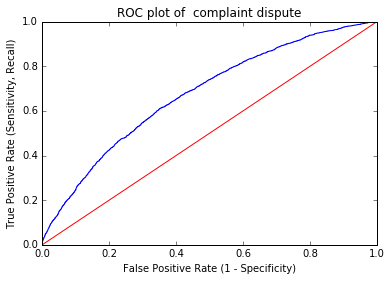

In [131]:
plot_roc(v_probs, y_test, "ROC plot of  complaint dispute", 
         "False Positive Rate (1 - Specificity)", "True Positive Rate (Sensitivity, Recall)")

In [132]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test, v_probs)

0.6754403768512367

In [133]:
skm.recall_score(y_test, lr.predict(X_test))

0.59184384803067269

In [134]:
pd.crosstab(y_test, lr.predict(X_test))

col_0,False,True
row_0,,
False,6011,3060
True,1171,1698


In [135]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_true):
    cm = confusion_matrix(y_true, model.predict(X_test))

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[6011 3060]
 [1171 1698]]


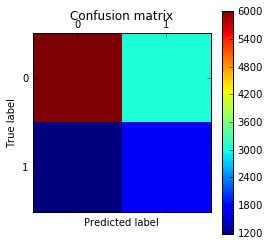

In [136]:
plot_confusion_matrix(lr, X_test, y_test)

In [137]:
np.argsort(lr.coef_)[::-1]

array([[233, 250,  69, 181,  98, 198,  46, 213, 172,  96,  44, 144, 176,
         62,  20,  66,  47, 212, 187, 180,  87, 205,  33,  13, 149,  72,
         12,  77, 162, 112, 157, 193,  28, 145,   6, 215, 222, 122,  26,
         16,  59, 136,  97, 182,  60,  95, 208, 108, 158, 150,  14, 164,
          3, 188, 128,  91, 201,  82, 106, 168,   5,  90, 119, 185, 235,
         57, 179, 214, 109, 140,  18,  73, 100, 232, 147,  22, 217, 170,
         68,  67,  24,   8, 225, 102, 203, 139,  23, 133,  49,  93,  42,
        155,  75,  89,   1, 211,  64,  71,  43, 190, 197, 135, 138, 223,
         40, 132, 195, 142, 238,  85,  45, 246, 166, 242,  31,  50, 174,
         92, 167, 248, 245, 105, 111, 247, 239,  39,  17, 117, 234,  53,
        249, 184, 159,  37, 171, 227, 243, 240, 120, 241,  84,  80,  19,
         78, 104,   0,  29, 236,  36,  55, 160,  56, 146,  81, 163, 206,
        224,  10,   4, 204, 121,  41, 131, 226,  58, 110,  15, 186, 118,
        178, 207,  32, 177,  88, 237,   9,  86, 116

In [138]:
sub_column = df_model.columns[np.argsort(lr.coef_)[::-1]][0][:245]

In [139]:
sub_column.shape

(245,)

In [140]:
X_sub_column = df_model[sub_column]
X_sub_train, X_sub_test, y_train, y_test = train_test_split(X_sub_column, y, test_size=0.20, random_state=67)

In [141]:
lr_sub = LogisticRegression(class_weight='auto')
lr_sub.fit(X_sub_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [142]:
lr_sub.score(X_sub_test,y_test)

0.57554438860971524

In [143]:
skm.roc_auc_score(y_test,lr_sub.predict_proba(X_sub_test)[:, 1])

0.65143760164142528

## Now try descision tree model

In [144]:
#Gradiend Boosting Classifier
#from sklearn.ensemble import GradientBoostingClassifier

In [145]:
#gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=8, subsample=0.5, 
                             #   max_features='auto', learning_rate=0.01)
#gbc.fit(X_train, y_train)

In [146]:
#gbc.score(X_test,y_test)

In [147]:
#pd.crosstab(y_test, gbc.predict(X_test))

In [148]:
#plot_confusion_matrix(gbc, X_test, y_test)

In [149]:
#skm.roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])

In [150]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [151]:
rfc = RandomForestClassifier(n_estimators=3000, n_jobs=-1, class_weight='auto')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [152]:
rfc.score(X_test, y_test)

0.767001675041876

In [153]:
pd.crosstab(y_test, rfc.predict(X_test))

col_0,False,True
row_0,,
False,8926,145
True,2637,232


In [154]:
skm.roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

0.67808267446244042

In [155]:
skm.recall_score(y_test, rfc.predict(X_test))

0.080864412687347509

[[8926  145]
 [2637  232]]


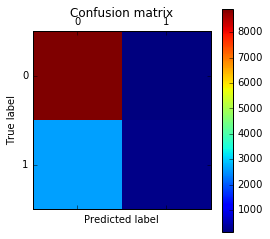

In [156]:
plot_confusion_matrix(rfc, X_test, y_test)

In [157]:
def plot_importance(clf, X, max_features=10):
    '''Plot feature importance'''
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')

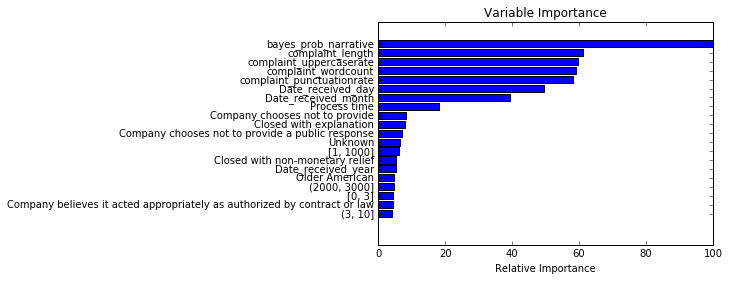

In [158]:
plot_importance(rfc, df_model, max_features=20)